# UAC20 Audio Class Device Topology Plotting - find and plot all

In [1]:
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..', 'codes')))

path = os.sep.join(['..', '..', '..', '..', '..', '待處理', 'Universal Serial Bus', 'bitbucket', 'github', 'codes'])
sys.path.append(path) 

path = os.sep.join(['..', '..', '..', '..', '..', '待處理', 'ORM', 'bitbucket', 'github', 'codes'])
sys.path.append(path)

## Find all audio devices

In [4]:
from universal_serial_bus import find_all_devices_by_class 
from universal_serial_bus.legacy import DEVICE_CLASS
    
devices, devices_ids =  find_all_devices_by_class(DEVICE_CLASS.Audio)
[(hex(v), hex(p)) for (v, p) in devices_ids]

[('0x1b3f', '0x2008')]

## Plot Topolographs

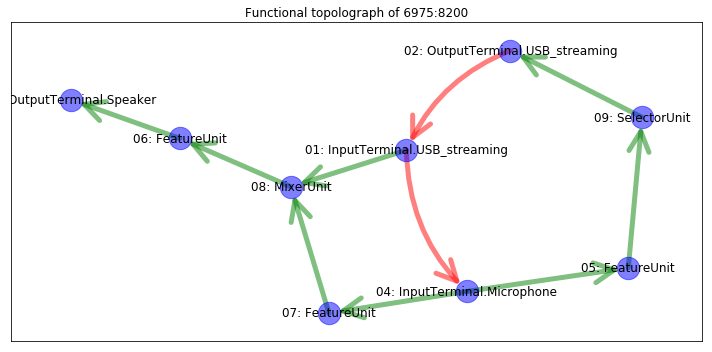

In [4]:
from usb_audio.orm import uac20 
import usb.util

def plot_topolographs(devices):

    def plot_topolograph(idVendor, idProduct):
        ax = plt.gca()         
        title = 'Functional topolograph of {}:{}'.format(idVendor, idProduct) 
        ax.set_title(title, fontsize = 12)
        
        dev = uac20.UACdevice(vid = idVendor, pid = idProduct) 
        dev.draw_topolograph(node_size = 500, label_font_size = 12,
                             edge_width = 5, edge_arrowstyle = '->', edge_arrowsize = 50)
        
    n = len(devices) 
    fig, axs = plt.subplots(n, 1, figsize = (10, 5*n))
    
    for device in devices:
        plot_topolograph(*device)

plot_topolographs(devices_ids)
plt.tight_layout()

## Device info

In [10]:
dev = uac20.UACdevice(0x1b3f, 0x2008)

dev.usb_version

1.1

In [11]:
dev.uac_version

1.0

In [12]:
dev.audio_control_descriptors

[array('B', [9, 4, 0, 0, 0, 1, 1, 0, 0])]

In [13]:
dev.audio_streaming_descriptors

[array('B', [9, 4, 1, 0, 0, 1, 2, 0, 0]),
 array('B', [9, 4, 1, 1, 1, 1, 2, 0, 0]),
 array('B', [9, 4, 2, 0, 0, 1, 2, 0, 0]),
 array('B', [9, 4, 2, 1, 1, 1, 2, 0, 0])]

In [14]:
dev.audio_control_header_descriptors

array('B', [10, 36, 1, 0, 1, 100, 0, 2, 1, 2])